# **Final Project - Unit 2: Data Understanding**

## Name: Cabot Steward
## *DATA 3300*

## Introduction

For this final project, we will take on the role of consultants for Aggie Investments, a Real Estate Investment Firm. In recent years, there has been a significant trend among investment firms to acquire properties for use as rental assets. While various geographies have been proposed, our focus is to assess the opportunities within a specific, rapidly growing market—Nashville, Tennessee.

Our task is to analyze a provided dataset containing information on current Airbnb listings in the Nashville area. The objective is to explore the data comprehensively and provide informed recommendations to Aggie Investments regarding the potential of entering this market, the types of listings they should acquire, and how they should manage those listings. The project will involve data preparation, exploration, and the application of unsupervised machine learning models to uncover deeper insights and patterns within the data. These findings will guide our final recommendations to the firm.

---

### **Unit 2: Data Understanding**

**Unit 2** covers how to describe and visualize data for the purpose of exploratory data analysis (EDA), as well as how to identify and handle missing data and outliers. **In this next portion of the final project, you will apply these concepts to `data3300_airbnb_data_clean_nashville.csv`, a cleaned version of our original dataset to begin exploring patterns in the dataset as well as address any issues related to missing data or outliers.** These steps will get you prepared for the Unit 3 portion, where you will begin modeling the data!


**1 - Begin by loading in the necessary dependencies and reading in the cleaned airbnb nashville dataset**

In [1]:
# replace with code to import the libraries and packages required to import data, manipulate dataframes, and produce plots (visualize data)
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
# replace with code to import cleaned Airbnb Dataset, call your dataset df2
pd.set_option('display.max_columns', None) 
df2 = pd.read_csv('data3300_airbnb_data_clean_nashville.csv')
df2.head()

,id,host_id,host_is_superhost,calculated_host_listings_count,host_has_profile_pic,host_identity_verified,host_listings_count,neighbourhood_cleansed,availability_365,minimum_nights,room_type,accommodates,bedrooms,beds,price,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,avg_air_quality,days_as_host,bathrooms,short_term
0,6422.0,12172,0,1,1,1,1,District 6,172,30,Private room,1,1.0,1.0,43.0,670,3.63,4.95,4.94,4.96,4.97,4.96,4.92,4.98,1.732078,5606,1.0,0
1,39870.0,171184,1,1,1,1,1,District 25,186,1,Private room,2,1.0,1.0,70.0,478,5.05,4.94,4.94,4.92,4.98,4.97,4.93,4.92,1.732078,5135,1.0,1
2,59576.0,812128,1,9,1,1,19,District 12,178,30,Private room,1,1.0,1.0,43.0,2,0.08,4.50,5.00,3.50,5.00,5.00,5.00,5.00,1.720434,4776,1.0,0
3,72906.0,176117,1,1,1,1,1,District 18,49,2,Entire home/apt,2,2.0,2.0,107.0,731,4.60,4.92,4.90,4.83,4.98,4.99,4.97,4.90,1.732078,5132,1.0,1
4,258817.0,22296,1,6,1,1,15,District 12,301,30,Private room,2,1.0,2.0,39.0,97,0.64,4.78,4.81,4.41,4.92,4.91,4.74,4.73,1.720434,5529,1.0,0


### 2) **Review your variables**

Consider the objective of Aggie Investments, then list the top three variables you believe will be most important in the analysis, briefly explaining why each of these three could be particularly important **(there are no wrong answers, but make sure you explain your logic for full points).**

1.   minimum_nights - try to identify if longer or shorter stay requirements is better.
2.   avg_air_quality - this is due to their requirements of trying to find a trend around air quality.  I don't agree with including this one but due to the requirements feel the  needs to put it.
3.  bedrooms - adding a 4th to make up for the last, try to see what size of property has the best chance of being successful.


## **Part 1: Descriptive Statistics**


### **Observation of Descriptive Statistics**

In order for us to be able to understand our dataset, and begin to build recommendations for the firm we need to understand our data.

Explore the descriptive statistics from our dataset. Compare and describe three different observations made from your exploration of the descriptive statistics. Why could these be of interest to Aggie Investments? **Provide the specific descriptive statistic (e.g., the mean 365_availability is 50 days) you are using in your observation and be clear why this statistic could be of importance.** Some of these observations could potentially be used in your recommendations to the firm.

**Hint:** Consider the variables you listed as important above, if they are quantitative you can describe them, if they are qualitative, you can use them as a grouping variables on other quantitative variables!

*If you need some reminders about how to do this, revisit the descriptive statistics module!*


### **3 - Observation 1**

In [25]:
# replace with the code to examine descriptive statistics (.describe), hint: it may be particularly insightful to group the descriptive stats by different qualitative variables
df2.groupby('minimum_nights')['review_scores_rating'].describe().sort_values(by='mean', ascending=True)
# df2.head()

,count,mean,std,min,25%,50%,75%,max
minimum_nights,,,,,,,,
100,1.0,4.140000,NaN,4.14,4.1400,4.140,4.1400,4.14
28,16.0,4.685000,0.540728,3.00,4.4825,4.960,5.0000,5.00
10,4.0,4.687500,0.462556,4.00,4.6375,4.875,4.9250,5.00
7,16.0,4.761875,0.488047,3.00,4.7150,4.920,5.0000,5.00
1,3095.0,4.784701,0.340741,1.00,4.7500,4.880,4.9600,5.00
31,66.0,4.795606,0.340796,3.00,4.6850,4.965,5.0000,5.00
32,2.0,4.800000,0.098995,4.73,4.7650,4.800,4.8350,4.87
14,12.0,4.806667,0.322189,4.00,4.6000,5.000,5.0000,5.00
30,758.0,4.818127,0.402667,1.00,4.8000,5.000,5.0000,5.00


List the specific descriptive statistic you're observing, and indicate why Aggie Investments would find that observation interesting:


### **4 - Observation 2**

In [32]:
# replace with the code to examine a different descriptive stat for observation 2
df2.groupby('neighbourhood_cleansed')['avg_air_quality'].describe().sort_values(by='50%', ascending=True)
# df2.head()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
District 35,23.0,1.671640,9.738102e-03,1.665982,1.665982,1.665982,1.676826,1.687671
District 22,20.0,1.670320,8.901182e-03,1.665982,1.665982,1.665982,1.665982,1.687671
District 10,32.0,1.699308,1.847550e-02,1.688699,1.688699,1.688699,1.697403,1.732078
District 27,41.0,1.694064,8.992121e-16,1.694064,1.694064,1.694064,1.694064,1.694064
District 26,65.0,1.695234,6.615745e-03,1.694064,1.694064,1.694064,1.694064,1.732078
District 30,30.0,1.696084,3.139201e-03,1.694064,1.694064,1.694064,1.700799,1.700799
District 23,21.0,1.707377,2.334704e-02,1.665982,1.694064,1.694064,1.732078,1.732078
District 4,32.0,1.694064,1.127988e-15,1.694064,1.694064,1.694064,1.694064,1.694064
District 34,17.0,1.698536,1.262456e-02,1.694064,1.694064,1.694064,1.694064,1.732078


List the specific descriptive statistic you're observing, and indicate why Aggie Investments would find that observation interesting:


### **5 - Observation 3**

In [27]:
# replace with the code to examine a different descriptive stat for observation 3
df2.groupby('bedrooms')['review_scores_rating'].describe()
# do see some bad data in this dataset still below... needs further investigation.
# df2.head()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0.0,342.0,4.787222,0.294229,3.00,4.7000,4.875,4.9800,5.00
1.0,2456.0,4.787997,0.395796,1.00,4.7600,4.900,4.9800,5.00
2.0,1837.0,4.815084,0.269954,1.00,4.7600,4.890,4.9700,5.00
3.0,1593.0,4.844350,0.229596,3.00,4.8000,4.910,4.9800,5.00
4.0,1482.0,4.856255,0.225653,2.00,4.8100,4.910,4.9900,5.00
5.0,68.0,4.860147,0.261068,3.00,4.8500,4.900,5.0000,5.00
6.0,53.0,4.860189,0.188634,4.09,4.8000,4.920,5.0000,5.00
7.0,6.0,4.895000,0.124056,4.67,4.8625,4.930,4.9825,5.00
8.0,35.0,4.868000,0.124730,4.57,4.8000,4.890,4.9750,5.00


List the specific descriptive statistic you're observing, and indicate why Aggie Investments would find that observation interesting:


Shorter term rentals (under 2 days) have substantially more reviews and stays than longer term properties.  There is a significant fall off after just 2 days, with after the 3 accounting for very few reviews.


Air quality
district 22, 35, 4, 27, 26, and 10 have the worst air quality

Larger properties have higher reviews but have a smaller sample, it is likely that there is not a correlation between bedrooms and customer reviews.

For neighborhoods:
    avoid districts 32, 13, 30, 21, 19, 12 by median
    avoid districts 32, 13, 15, 22, 2, 21 by mean
    Lets avoid 32, 13, and 21

### **6) Hypothesis**

Take two observations from above and provide a hypothesis for each as to the reason these patterns may exist. Note which observations you are referring to and provide a logical hypothesis for each.

* **Hypothesis 1:**  Observation 1 - Individuals want more shorter term rentals and are more likely to provide a review.  This likely could be due to the platform that they are booked on, if these are booked on a platform based around short term rentals it could be the cause for the higher quantity of reviews. 
* **Hypothesis 2:** Observation 3 - Buildings with a lower quantity of rooms are booked more often.  After 4 bedrooms there is a significant fall off in reviews and bookings.  This is likely due to individuals not needing that many rooms.

## **Part 2: Data Visualizations**

The next phase in our data analysis involves constructing data visualizations to deepen our understanding of the dataset. You are required to create three distinct data visualizations, ensuring that each one represents a different type of visualization.

**These visualizations should reflect either the above observations or hypotheses you provided.** Use this as an opportunity to produce a visual story that sheds light on/communicates a critical observation for Aggie Investments or highlights a hypothesis that is worth exploring further (in a subsequent analysis).

You may use existing categories within the dataset or generate new categories from numerical variables. **After each visualization, provide a detailed interpretation of the insights it reveals and discuss how these insights could be leveraged in formulating our recommendations to Aggie Investments.**

### **7 - Visualization 1** - should support above observations or hypothesis

<Axes: title={'center': 'Quantity of Bedrooms'}>

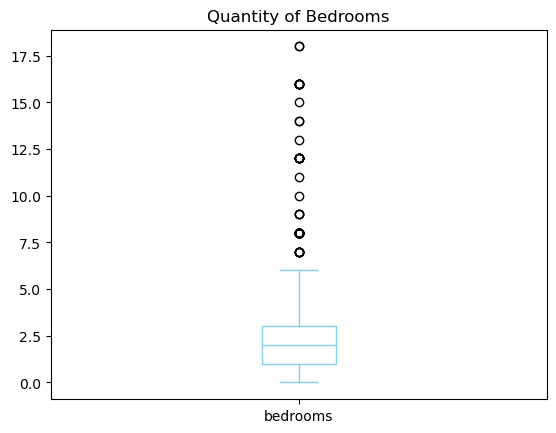

In [ ]:
# replace with the code used for visualization 1
df2['bedrooms'].plot(kind='box', color='skyblue', title="Quantity of Bedrooms")

**Insights:**


### **8 - Visualization 2** - should support above observations or hypothesis

<Axes: title={'center': 'bedrooms to reviews rating'}, xlabel='review_scores_rating', ylabel='minimum_nights'>

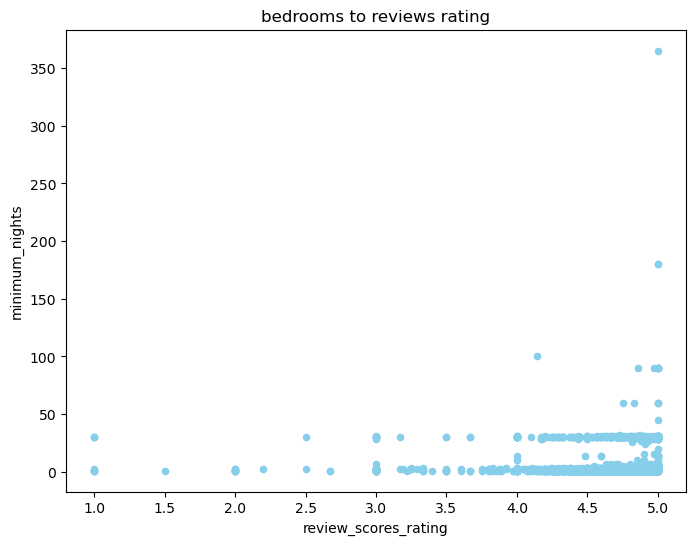

In [ ]:
# replace with the code used for visualization 2
df2.plot(kind='scatter', 
        x='review_scores_rating',
         y='minimum_nights', 
         color='skyblue', 
         figsize=(8, 6),
         title="bedrooms to reviews rating"
         )

**Insights:**

### **9 - Visualization 3** - should support above observations or hypothesis

In [36]:
df2.columns

Index(['id', 'host_id', 'host_is_superhost', 'calculated_host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'host_listings_count',
       'neighbourhood_cleansed', 'availability_365', 'minimum_nights',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'reviews_per_month', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'avg_air_quality',
       'days_as_host', 'bathrooms', 'short_term'],
      dtype='object')

<Axes: title={'center': 'bedrooms to accommodates'}, ylabel='Frequency'>

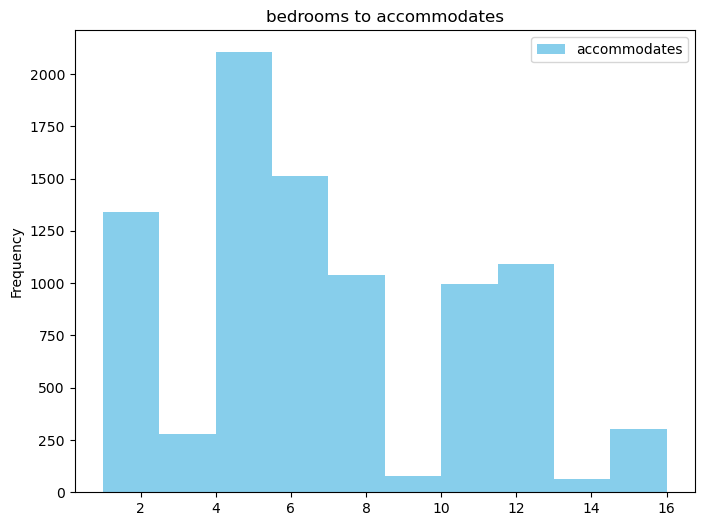

In [41]:
# replace with the code used for visualization 3
df2.plot(kind='hist', 
        x='bedrooms',
         y='accommodates', 
         color='skyblue', 
         figsize=(8, 6),
         title="bedrooms to accommodates"
         )


**Insights:**

## **Part 3: Outliers \& Missing Data**






### **Addressing Missing Data**

In this section you will focus on identifying and addressing missing data within our Airbnb listing dataset. Begin by conducting a thorough analysis to identify any missing values across the dataset. Once identified, discuss the potential impact of these missing values on our analysis and the validity of our findings.

Next, apply appropriate techniques to handle the missing data. You may choose methods such as imputation, deletion, or any other technique that best suits the nature of the data and the context of the analysis. Justify your chosen approach, explaining why it is the most suitable for this dataset. Finally, document the steps taken and reflect on how your handling of missing data will influence the overall analysis and recommendations to Aggie Investments.

*If you need a reminder on approaches for identifying and handling missing values and outliers, revisit the Outliers and Missing Data module*

**10) First, create a Heatmap of Missing Values within the Dataset:**

In [ ]:
# replace with code to produce heatmap of missing (and non missing) data


**11) List which variables within the dataset contain missing values, as well as the percentage of data that is missing for that variable. *Hint: If there are any groupings of similar missing variables that share the same proportion of misisng data, you can list them as one group, instead of all individually*.**



In [ ]:
# fill in the variable(s) you want to examine the missing values of
percent_missing = df2['insert var'].isnull().sum() * 100 / len(df2['insert same var'])
print(f'{percent_missing:.2f}%')

* Missing var name and percent missing
* Missing var name and percent missing
* Missing var name and percent missing




**12) Are there any variables with complete data (no missing values) that could be related to the missingness seen in the multitude of *review* variables with missing data? If so, what does this indicate about the type of missing data these variables have?**

In [ ]:
# replace with code to compare the complete variable against one or more missing variables to confirm your above statement

**13) Proposed Type of Missing Data:**

**Fill in the variables you believe fall under each type of missing data (it's fine if some missing data categories have no variables listed), and then briefly explain below why you think those variables are structurally missing, MCAR, MAR, or MNAR.**



* Structurally Missing Variables:
* Missing Completely at Random Variables:
* Missing at Random Variables:
* Missing not at Random Variables:

**Explanation**:

**14) Replacing Missing Values:**

**Start with the variables that have structurally missing data. What is an acceptable value (or set of values) to fill in for these observations, given that the data are structurally missing?**



**15) Based on your explanation above, proceed with filling the missing values for your structurally missing variables below:**

In [ ]:
# replace with code to fill in the missing values in the reviews_per_month column with 0, then check for missing data in that column

In [ ]:
# this code can be used to fill in NaNs in all the columns starting with 'review_scores'

review_scores_cols = [col for col in df2.columns if col.startswith('review_scores_')]
for col in review_scores_cols:
  df2[col].fillna('insert value or text label here', inplace=True) # insert the value or text label you'd like to replace NaNs with here

**16) Next, address any variables that have data that are MCAR or MAR. What differentiates variables that are missing *completely* at random (MCAR) from those missing at random?**

**17) Use the code cells below to investigate any patterns of missingness for variables you think are MAR. *Hint: try plotting the relationship between missingness of the given variables against complete variables you think could influence missingness.***

In [ ]:
"""replace with code used for plotting missingness of one variable against the values of different complete variables
   Here is one example for `price` against `host_has_profile_pic`, you can copy this code into additional code cells to check multiple variables!"""

# Calculate the percentage of missing values in 'price' for each 'host_has_profile_pic' category
percentage_missing = df2.groupby('host_has_profile_pic')['price'].apply(lambda x: x.isnull().sum() / len(x) * 100)

# Create a bar plot
plt.figure(figsize=(10, 6))
percentage_missing.plot(kind='bar')
plt.xlabel('Does the Host have a Profile Pic?')
plt.ylabel('Percentage of Missing Prices')
plt.title('Relationship between Host Profile Pic and Missing Prices')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**18) Can you note any patterns to the missingness of these variables that could further indicate they are MAR?**

* Notes about Price
* Notes about air quality

**19) How should MAR observations be handled? How will you proceed based on your findings above?**

### **Identifying \& Addressing Outliers for Handling Missing Data**

**20) Before we can peform any imputation, let's make sure we don't have outliers first. Note down any variables we will be imputing that also containing outliers below...**



* Var 1...
* Var 2...

In [ ]:
# replace with code to check variables for outliers (via a boxplot)

**21) How can you address these outliers before proceeding with handling your missing data values?**

In [ ]:
# replace with code to log transform outliers for first variable
# replace with code to recheck for outliers via a boxplot

**22) Did transforming the variable change the distribution? Is it roughly normal (yes or no), and what does that mean in terms of performing a simple imputation?**

**23) Perform Imputation (simple or multiple) for the first variable below:**

In [ ]:
# replace with code to remove or impute first variable observations with missing data

**24) Perform Imputation (simple or multiple) for the second variable below:**

In [ ]:
# repeat with additional variables, consider what type of imputation is appropriate given the data distribution AND patterns of missingness

**25) Are there any variables that could potentially be MNAR? When data are MNAR, what can be done about it?**


### **Additional Outliers**

**Identify any remaining outliers by using a grid of boxplots. Then, choose two variables with outliers to either transform or discretize. For each variable, explain what step you took and whether the step was successful in addressing the presence (of at least extreme) outliers.**

**26) List the two variables you identified as having outliers that you want to transform/discretize here:**

* Var 1
* Var 2

In [ ]:
# this code creates a grid of boxplots for the int and float variables

# Select numerical columns
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns

# Create a grid of boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
  plt.subplot(5, 5, i+1)
  sns.boxplot(x=df2[col])
  plt.title(col)
plt.tight_layout()
plt.show()

**27) Perform a transformation/discretization on your first selected variable below, explain what step you took and whether it has reduced/fixed your outliers for this variable (hint: you can check with a boxplot or histogram to confirm).**

In [ ]:
# replace with code needed for addressing variable 1 with outliers

**Explanation of steps taken and whether the steps worked**:

**28) Perform a transformation or discretization on your second selected variable. Explain what step you took and whether it has reduced/fixed your outliers for this variable (hint: you can check with a boxplot or histogram to confirm).**

In [ ]:
# replace with code needed for addressing variable 2 with outliers

**Explanation of steps taken and whether the steps worked**:

### **29) Guiding Next Steps**

**You are about to pass off this data for its next steps in modeling. 1) What should the data team know about problems you encountered in the dataset, and how you handled these issues? 2) Are there any unresolved issues they should be aware of? 3) Finally, provide a brief explanation from Parts 1 and 2 regarding interesting observations or hypotheses you noted, that they should continue to explore as they begin modeling.**



* 1)   
* 2)   
* 3)



In [ ]:
# export your finalized dataset and turn in with your submission!